In [118]:
# https://www.youtube.com/watch?v=tGpMb8R9D9M&t=994s


In [117]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt


In [119]:
df = pd.read_csv(f"C:\\Users\Grant\Desktop\work_git\work\data\\4h\FETUSDT_4h.csv")

In [120]:
df.Time = pd.to_datetime(df.Time, format='%Y.%m.%d %H:%M:%S.%f')
df = df.set_index(df.Time)


In [121]:
price = df.Close.iloc[:100]
max_idx = list(argrelextrema(price.values, np.greater, order=1)[0])
min_idx = list(argrelextrema(price.values, np.less, order=1)[0])
print(max_idx)
print(min_idx)

# from ordinal position get index
# max_idx = df.index[max_idx]



[2, 8, 11, 14, 17, 23, 27, 29, 32, 36, 41, 46, 50, 52, 55, 59, 61, 64, 66, 70, 72, 77, 80, 85, 88, 91]
[4, 10, 13, 16, 22, 26, 28, 30, 35, 38, 45, 48, 51, 53, 58, 60, 62, 65, 69, 71, 75, 79, 83, 87, 90, 95]


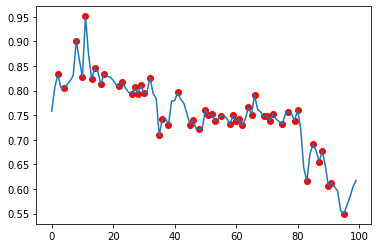

In [123]:
idx = max_idx+min_idx
idx.sort()

peaks = price.values[idx]

plt.plot(price.values)
plt.scatter(idx,peaks,c='r')
plt.show()